In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler


## Random Oversampling with Evaluation


In [2]:
df= pd.read_csv('heart2022python.csv')
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0,2,4,0,1,9,0,0,0,0,...,10,1.60,71.67,27.99,0,0,1,1,0,0
1,1,2,0,0,1,6,0,0,0,0,...,11,1.78,95.25,30.13,0,0,1,1,0,0
2,1,2,0,0,0,8,0,0,0,0,...,12,1.85,108.86,31.66,1,0,0,1,0,1
3,0,4,5,0,1,9,0,0,0,0,...,13,1.70,90.72,31.32,0,0,1,1,0,1
4,0,3,3,15,1,5,0,0,0,0,...,13,1.55,79.38,33.07,0,0,1,1,0,0


## splite data

In [3]:
df.drop(['SleepHours',"DeafOrHardOfHearing",'BlindOrVisionDifficulty',"DifficultyConcentrating","DifficultyWalking",'DifficultyDressingBathing',"DifficultyErrands","ECigaretteUsage","ChestScan",'HeightInMeters',"WeightInKilograms","HIVTesting",'FluVaxLast12',"PneumoVaxEver","HighRiskLastYear","CovidPos"],axis=1,inplace=True)



df.shape
df['HadHeartAttack'].value_counts()


HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

In [4]:
x = df.drop(["HadHeartAttack"] , axis = 1).values
y = df["HadHeartAttack"].values

In [5]:

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ros, y_ros, test_size=0.25, random_state=42)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)

## random forest

In [7]:




# # Inicjalizacja modelu z domyślnymi parametrami
# rf = RandomForestClassifier()

# # Określenie siatki parametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew
#     'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
#     'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
# }

# # Utworzenie obiektu GridSearchCV
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# cv_rf.fit(x_train1, y_train1)

# # Najlepszy zestaw parametrów
# print("Najlepsze parametry: ", cv_rf.best_params_)

# # Najlepszy estimator
# best_rf = cv_rf.best_estimator_

params = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

rf_clf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features'])
rf_clf.fit(x_train1, y_train1)

# Predykcje i ocena modelu
ypred_train = rf_clf.predict(x_train1)
ypred_test = rf_clf.predict(x_test1)

print("Training Results\n")
print(classification_report(y_train1, ypred_train))
print("Test Results\n")
print(classification_report(y_test1, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test1, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# # Ocena modelu za pomocą walidacji krzyżowej
# cross_val_scores = cross_val_score(rf_clf, x_train1, y_train1, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

Training Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174285
           1       1.00      1.00      1.00    174595

    accuracy                           1.00    348880
   macro avg       1.00      1.00      1.00    348880
weighted avg       1.00      1.00      1.00    348880

Test Results

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     58302
           1       0.96      1.00      0.98     57992

    accuracy                           0.98    116294
   macro avg       0.98      0.98      0.98    116294
weighted avg       0.98      0.98      0.98    116294

Confusion Matrix:
 [[56190  2112]
 [   66 57926]]


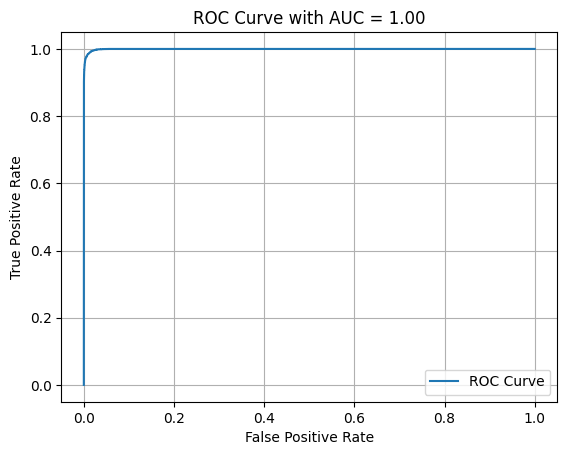

In [8]:

y_proba_test = rf_clf.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [9]:

# param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'criterion': ['gini', 'entropy']
# }

# # Utworzenie modelu drzewa decyzyjnego
# tree = DecisionTreeClassifier()

# # Uruchomienie Grid Search z walidacją krzyżową
# grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train1, y_train1)

# # Wyświetlenie najlepszych parametrów i wyników
# print("Najlepsze parametry:", grid_search.best_params_)
# print("Najlepsza dokładność:", grid_search.best_score_)

# # Utworzenie i ocena modelu z najlepszymi parametrami
# best_tree = grid_search.best_estimator_
# best_tree.fit(x_train1, y_train1)

params = {
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'criterion': 'gini'
}

best_tree = DecisionTreeClassifier(
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    criterion=params['criterion'])
best_tree.fit(x_train1, y_train1)

ypred_train2 = best_tree.predict(x_train1)
ypred_test2 = best_tree.predict(x_test1)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train1, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test1, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
# cross_val_scores = cross_val_score(best_tree, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

Training Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174285
           1       1.00      1.00      1.00    174595

    accuracy                           1.00    348880
   macro avg       1.00      1.00      1.00    348880
weighted avg       1.00      1.00      1.00    348880

Testing Results

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     58302
           1       0.95      1.00      0.97     57992

    accuracy                           0.97    116294
   macro avg       0.97      0.97      0.97    116294
weighted avg       0.97      0.97      0.97    116294



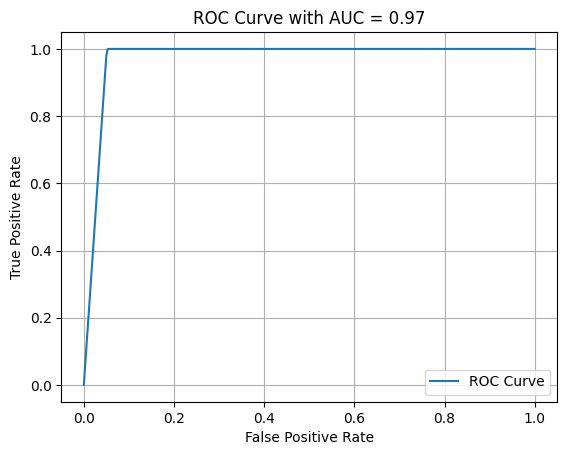

In [10]:

y_proba_test = best_tree.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [11]:
Gnb = GaussianNB()
Gnb.fit(x_train1, y_train1)
ypred_train3 = Gnb.predict(x_train1)
y_pred_test3 = Gnb.predict(x_test1)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test1, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.7816912308459594


In [12]:
print('Testing Results\n')
print(classification_report(y_train1, ypred_train3))

Testing Results

              precision    recall  f1-score   support

           0       0.76      0.83      0.79    174285
           1       0.81      0.73      0.77    174595

    accuracy                           0.78    348880
   macro avg       0.78      0.78      0.78    348880
weighted avg       0.78      0.78      0.78    348880



In [13]:
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

           0       0.76      0.83      0.79     58302
           1       0.81      0.74      0.77     57992

    accuracy                           0.78    116294
   macro avg       0.78      0.78      0.78    116294
weighted avg       0.78      0.78      0.78    116294



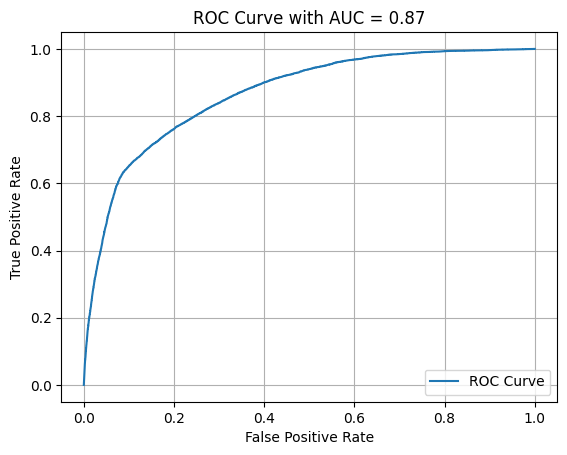

In [14]:
# cross_val_scores = cross_val_score(Gnb, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = Gnb.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST


Accuracy on Training set:  0.8896468699839486
Accuracy on Test set:  0.8790909247252653

Training Results

              precision    recall  f1-score   support

           0       0.89      0.89      0.89    174285
           1       0.89      0.89      0.89    174595

    accuracy                           0.89    348880
   macro avg       0.89      0.89      0.89    348880
weighted avg       0.89      0.89      0.89    348880

Testing Results

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     58302
           1       0.87      0.88      0.88     57992

    accuracy                           0.88    116294
   macro avg       0.88      0.88      0.88    116294
weighted avg       0.88      0.88      0.88    116294



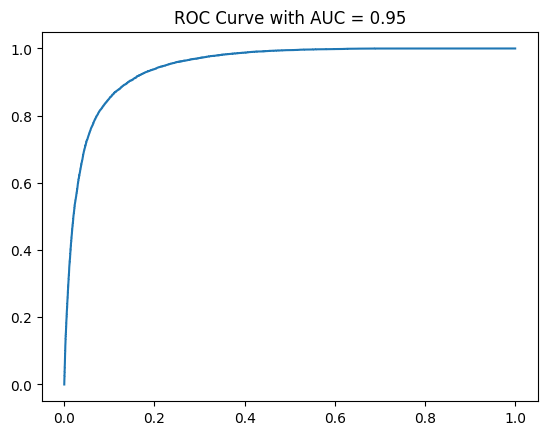

In [15]:




# # Inicjalizacja modelu XGBoost
# xg = XGBClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train1, y_train1)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_xg = grid_search.best_estimator_

params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.2,
    'subsample': 0.7,
    'colsample_bytree': 0.9
}

best_xg = XGBClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'])
best_xg.fit(x_train1, y_train1)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train1)
y_pred_test4 = best_xg.predict(x_test1)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train1, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test1, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train1, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test4))

# cross_val_scores = cross_val_score(best_xg, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test1, y_proba_test4)))
plt.show()

## logistic regression

Accuracy on Training set:  0.7951014675533135
Accuracy on Test set:  0.7963867439420779

Training Results

              precision    recall  f1-score   support

           0       0.77      0.84      0.80    174285
           1       0.83      0.75      0.78    174595

    accuracy                           0.80    348880
   macro avg       0.80      0.80      0.79    348880
weighted avg       0.80      0.80      0.79    348880

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.84      0.81     58302
           1       0.82      0.75      0.79     57992

    accuracy                           0.80    116294
   macro avg       0.80      0.80      0.80    116294
weighted avg       0.80      0.80      0.80    116294



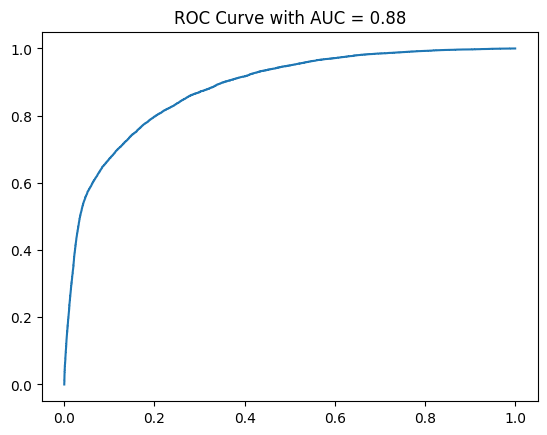

In [16]:


# # Inicjalizacja modelu regresji logistycznej
# lg = LogisticRegression()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
#     'penalty': ['l1', 'l2'],       # Typ regularyzacji
#     'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train1, y_train1)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_lg = grid_search.best_estimator_

params = {
    'C': 0.1,
    'penalty': 'l2',
    'solver': 'liblinear'
}

best_lg = LogisticRegression(
    C=params['C'],
    penalty=params['penalty'],
    solver=params['solver'])
best_lg.fit(x_train1, y_train1)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train1)
y_pred_test4 = best_lg.predict(x_test1)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train1, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test1, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train1, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test1, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Accuracy on Training set:  0.9122993579454254
Accuracy on Test set:  0.8963919032796189

Training Results

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    174285
           1       0.91      0.91      0.91    174595

    accuracy                           0.91    348880
   macro avg       0.91      0.91      0.91    348880
weighted avg       0.91      0.91      0.91    348880

Testing Results

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     58302
           1       0.89      0.91      0.90     57992

    accuracy                           0.90    116294
   macro avg       0.90      0.90      0.90    116294
weighted avg       0.90      0.90      0.90    116294



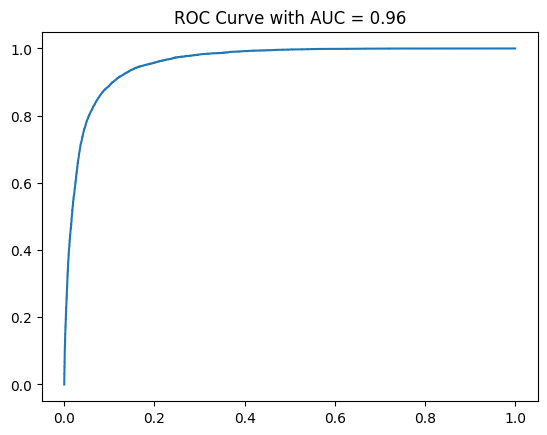

In [17]:


# # Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train1, y_train1)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_

params = {
    'n_estimators': 300,
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

best_gb = GradientBoostingClassifier(
    n_estimators=params['n_estimators'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'])
best_gb.fit(x_train1, y_train1)

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train1)
y_pred_test6 = best_gb.predict(x_test1)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train1, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test1, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train1, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test6))

# cross_val_scores = cross_val_score(best_gb, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test1, y_proba_test6)))
plt.show()

## KNN

In [18]:
knn = KNeighborsClassifier()
knn.fit(x_train1, y_train1)

KNeighborsClassifier()

In [19]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)

In [20]:
grid_cv.fit(x_train1, 
            y_train1)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [21]:
grid_cv.best_score_

0.9687242510288341

In [22]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [23]:
ypred_train8 = grid_cv.predict(x_train1)
y_pred_test8 = grid_cv.predict(x_test1)
print("XGBClassifier Accuracy: ",accuracy_score(y_test1, y_pred_test8))

XGBClassifier Accuracy:  0.9719847971520457


In [24]:
print("Training Results\n")
print(classification_report(y_train1, ypred_train8))

Training Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174285
           1       1.00      1.00      1.00    174595

    accuracy                           1.00    348880
   macro avg       1.00      1.00      1.00    348880
weighted avg       1.00      1.00      1.00    348880



In [25]:
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test8))

Testing Results

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     58302
           1       0.95      1.00      0.97     57992

    accuracy                           0.97    116294
   macro avg       0.97      0.97      0.97    116294
weighted avg       0.97      0.97      0.97    116294



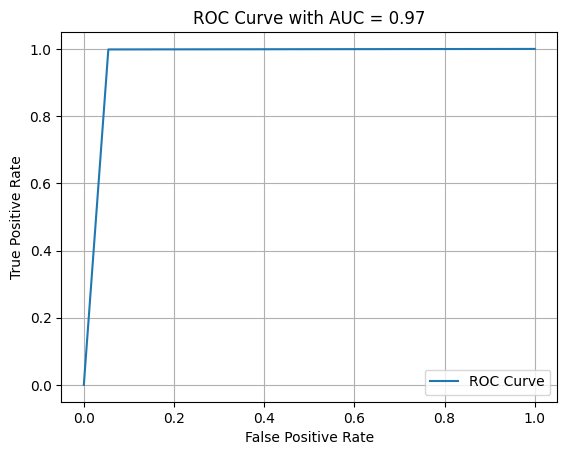

In [26]:
# cross_val_scores = cross_val_score(grid_cv, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = grid_cv.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [27]:
ann = tf.keras.models.Sequential()

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [29]:
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

In [30]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [31]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
ann.fit(x_train1, y_train1, batch_size = 32, epochs=100,
          validation_data=(x_test1, y_test1), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


10903/10903 [==============================] - 30s 2ms/step - loss: 0.4357 - accuracy: 0.7935 - val_loss: 0.4242 - val_accuracy: 0.8004
Epoch 2/100
10903/10903 [==============================] - 23s 2ms/step - loss: 0.4262 - accuracy: 0.7986 - val_loss: 0.4225 - val_accuracy: 0.8004
Epoch 3/100
10903/10903 [==============================] - 27s 2ms/step - loss: 0.4246 - accuracy: 0.7997 - val_loss: 0.4220 - val_accuracy: 0.8009
Epoch 4/100
10903/10903 [==============================] - 22s 2ms/step - loss: 0.4238 - accuracy: 0.8001 - val_loss: 0.4245 - val_accuracy: 0.7996
Epoch 5/100
10903/10903 [==============================] - 23s 2ms/step - loss: 0.4230 - accuracy: 0.8010 - val_loss: 0.4213 - val_accuracy: 0.8008
Epoch 6/100
10903/10903 [==============================] - 27s 2ms/step - loss: 0.4224 - accuracy: 0.8012 - val_loss: 0.4211 - val_accuracy: 0.8010
Epoch 7/100
10903/10903 [==============================] - 28s 3ms/step - loss: 0.4222 - accuracy: 0.8013 - va

In [34]:
ypred_train8 = ann.predict(x_train1)
y_pred_test8 = ann.predict(x_test1)

y_pred_test8 = (y_pred_test8 > 0.5)
ypred_train8 = (ypred_train8 > 0.5)
print(np.concatenate((y_pred_test8.reshape(len(y_pred_test8),1), y_test1.reshape(len(y_test1),1)),1))

3635/3635 [==============================] - 4s 1ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [35]:
accuracy_score(y_test1, y_pred_test8)

0.8038333877930074

In [36]:
print("Training Results\n")
print(classification_report(y_train1, ypred_train8))

Training Results

              precision    recall  f1-score   support

           0       0.79      0.83      0.81    174285
           1       0.82      0.78      0.80    174595

    accuracy                           0.80    348880
   macro avg       0.80      0.80      0.80    348880
weighted avg       0.80      0.80      0.80    348880



In [37]:
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test8))

Testing Results

              precision    recall  f1-score   support

           0       0.79      0.82      0.81     58302
           1       0.82      0.78      0.80     57992

    accuracy                           0.80    116294
   macro avg       0.80      0.80      0.80    116294
weighted avg       0.80      0.80      0.80    116294



3635/3635 [==============================] - 4s 1ms/step


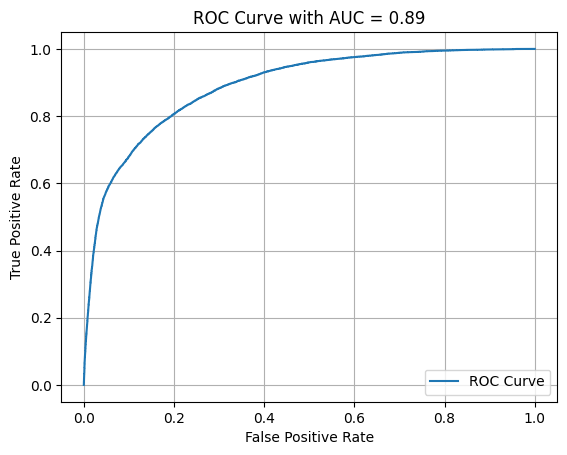

In [38]:
# cross_val_scores = cross_val_score(ann, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = ann.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [39]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(40,activation = 'relu'),
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train1,y_train1,epochs = 100)

Epoch 1/100
10903/10903 [==============================] - 18s 2ms/step - loss: 0.4326 - accuracy: 0.7945
Epoch 2/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4252 - accuracy: 0.7990
Epoch 3/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4220 - accuracy: 0.8010
Epoch 4/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4190 - accuracy: 0.8026
Epoch 5/100
10903/10903 [==============================] - 17s 2ms/step - loss: 0.4163 - accuracy: 0.8043
Epoch 6/100
10903/10903 [==============================] - 16s 2ms/step - loss: 0.4137 - accuracy: 0.8052
Epoch 7/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4113 - accuracy: 0.8063
Epoch 8/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4092 - accuracy: 0.8076
Epoch 9/100
10903/10903 [==============================] - 16s 2ms/step - loss: 0.4074 - accuracy: 0.8088
Epoch 10/100
10903/10903 [====================

In [40]:
model_22.evaluate(x_test1,y_test1)

3635/3635 [==============================] - 4s 1ms/step - loss: 0.3730 - accuracy: 0.8265


[0.37296438217163086, 0.8265000581741333]

In [41]:
ypred_train22 = model_22.predict(x_train1)
y_pred_test22 = model_22.predict(x_test1)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)

print(classification_report(y_train1,ypred_train22))
print(classification_report(y_test1,y_pred_test22))

3635/3635 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    174285
           1       0.82      0.84      0.83    174595

    accuracy                           0.83    348880
   macro avg       0.83      0.83      0.83    348880
weighted avg       0.83      0.83      0.83    348880

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     58302
           1       0.81      0.85      0.83     57992

    accuracy                           0.83    116294
   macro avg       0.83      0.83      0.83    116294
weighted avg       0.83      0.83      0.83    116294



3635/3635 [==============================] - 4s 1ms/step


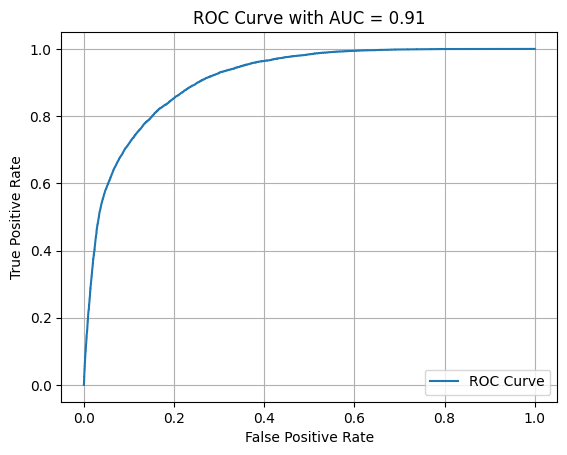

In [42]:
# cross_val_scores = cross_val_score(model_22, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model_22.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [43]:

tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train1,y_train1,epochs = 100)

Epoch 1/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4357 - accuracy: 0.7938
Epoch 2/100
10903/10903 [==============================] - 21s 2ms/step - loss: 0.4273 - accuracy: 0.7972
Epoch 3/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4262 - accuracy: 0.7980
Epoch 4/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4256 - accuracy: 0.7980
Epoch 5/100
10903/10903 [==============================] - 17s 2ms/step - loss: 0.4250 - accuracy: 0.7987
Epoch 6/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4247 - accuracy: 0.7994
Epoch 7/100
10903/10903 [==============================] - 17s 2ms/step - loss: 0.4242 - accuracy: 0.8002
Epoch 8/100
10903/10903 [==============================] - 17s 2ms/step - loss: 0.4238 - accuracy: 0.8003
Epoch 9/100
10903/10903 [==============================] - 20s 2ms/step - loss: 0.4234 - accuracy: 0.8005
Epoch 10/100
10903/10903 [====================

In [44]:
model_2.evaluate(x_test1,y_test1)

3635/3635 [==============================] - 5s 1ms/step - loss: 0.4128 - accuracy: 0.8053


[0.4128463566303253, 0.8052607774734497]

In [45]:
ypred_train11 = model_2.predict(x_train1)
y_pred_test11 = model_2.predict(x_test1)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)

print(classification_report(y_train1,ypred_train11))
print(classification_report(y_test1,y_pred_test11))

3635/3635 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.82      0.78      0.80    174285
           1       0.79      0.83      0.81    174595

    accuracy                           0.81    348880
   macro avg       0.81      0.81      0.81    348880
weighted avg       0.81      0.81      0.81    348880

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     58302
           1       0.79      0.83      0.81     57992

    accuracy                           0.81    116294
   macro avg       0.81      0.81      0.81    116294
weighted avg       0.81      0.81      0.81    116294



3635/3635 [==============================] - 5s 1ms/step


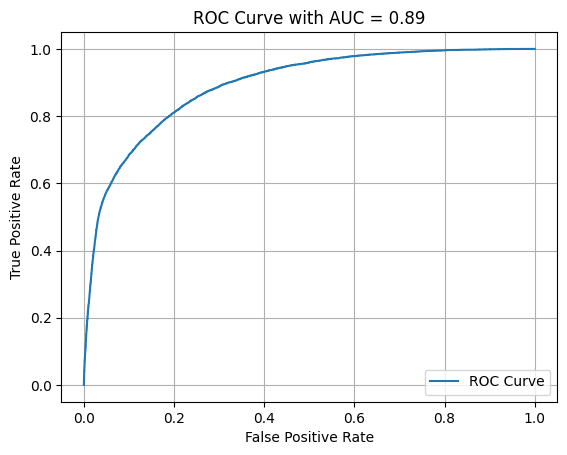

In [46]:
# cross_val_scores = cross_val_score(model_2, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model_2.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [47]:
model1 = Sequential()
model1.add(Dense(units=20,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [48]:
model1.fit(x=x_train1, 
          y=y_train1, 
          epochs=100,
          validation_data=(x_test1, y_test1), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
10903/10903 [==============================] - 24s 2ms/step - loss: 0.4814 - val_loss: 0.4269
Epoch 2/100
10903/10903 [==============================] - 21s 2ms/step - loss: 0.4616 - val_loss: 0.4266
Epoch 3/100
10903/10903 [==============================] - 20s 2ms/step - loss: 0.4599 - val_loss: 0.4286
Epoch 4/100
10903/10903 [==============================] - 18s 2ms/step - loss: 0.4589 - val_loss: 0.4252
Epoch 5/100
10903/10903 [==============================] - 19s 2ms/step - loss: 0.4590 - val_loss: 0.4242
Epoch 6/100
10903/10903 [==============================] - 18s 2ms/step - loss: 0.4585 - val_loss: 0.4253
Epoch 7/100
10903/10903 [==============================] - 18s 2ms/step - loss: 0.4571 - val_loss: 0.4245
Epoch 8/100
10903/10903 [==============================] - 18s 2ms/step - loss: 0.4574 - val_loss: 0.4246
Epoch 9/100
10903/10903 [==============================] - 17s 2ms/step - loss: 0.4570 - val_loss: 0.4250
Epoch 10/100
10903/10903 [====================

In [49]:
ypred_train12 = model1.predict(x_train1)
y_pred_test12 = model1.predict(x_test1)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)

print(classification_report(y_train1,ypred_train12))
print(classification_report(y_test1,y_pred_test12))

3635/3635 [==============================] - 3s 877us/step
              precision    recall  f1-score   support

           0       0.81      0.79      0.80    174285
           1       0.79      0.81      0.80    174595

    accuracy                           0.80    348880
   macro avg       0.80      0.80      0.80    348880
weighted avg       0.80      0.80      0.80    348880

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     58302
           1       0.79      0.81      0.80     57992

    accuracy                           0.80    116294
   macro avg       0.80      0.80      0.80    116294
weighted avg       0.80      0.80      0.80    116294



3635/3635 [==============================] - 3s 917us/step


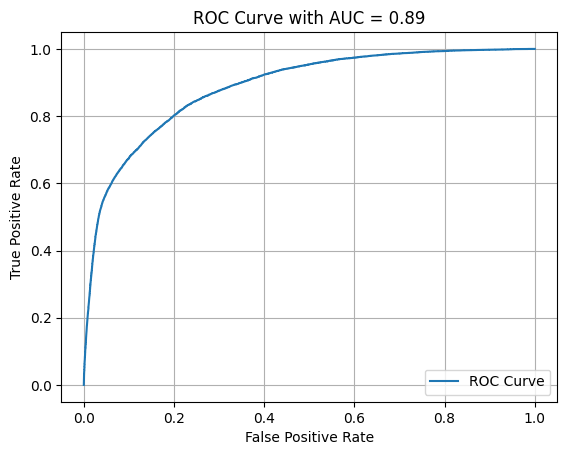

In [50]:
# cross_val_scores = cross_val_score(model1, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model1.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [51]:
model2 = Sequential()



model2.add(Dense(20,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
model2.fit(x=x_train1, 
          y=y_train1, 
          epochs=100,
          validation_data=(x_test1, y_test1), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
10903/10903 [==============================] - 17s 2ms/step - loss: 0.4531 - val_loss: 0.4255
Epoch 2/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4390 - val_loss: 0.4236
Epoch 3/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4377 - val_loss: 0.4233
Epoch 4/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4368 - val_loss: 0.4224
Epoch 5/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4366 - val_loss: 0.4214
Epoch 6/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4355 - val_loss: 0.4218
Epoch 7/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4358 - val_loss: 0.4203
Epoch 8/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4356 - val_loss: 0.4218
Epoch 9/100
10903/10903 [==============================] - 16s 1ms/step - loss: 0.4353 - val_loss: 0.4218
Epoch 10/100
10903/10903 [====================

In [53]:
ypred_train13 = model2.predict(x_train1)
y_pred_test13 = model2.predict(x_test1)

y_pred_test13 = (y_pred_test13 > 0.5)
ypred_train13 = (ypred_train13 > 0.5)

print("Training Results\n")
print(classification_report(y_train1,ypred_train13))
print("Testing Results\n")
print(classification_report(y_test1,y_pred_test13))

3635/3635 [==============================] - 3s 815us/step
Training Results

              precision    recall  f1-score   support

           0       0.80      0.81      0.80    174285
           1       0.81      0.80      0.80    174595

    accuracy                           0.80    348880
   macro avg       0.80      0.80      0.80    348880
weighted avg       0.80      0.80      0.80    348880

Testing Results

              precision    recall  f1-score   support

           0       0.81      0.80      0.80     58302
           1       0.80      0.81      0.80     57992

    accuracy                           0.80    116294
   macro avg       0.80      0.80      0.80    116294
weighted avg       0.80      0.80      0.80    116294



3635/3635 [==============================] - 3s 897us/step


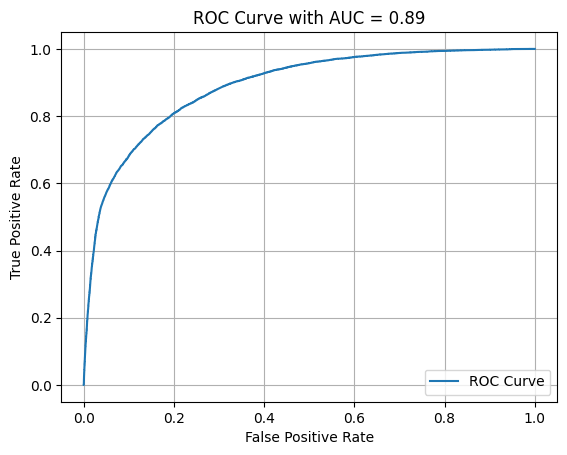

In [54]:
# cross_val_scores = cross_val_score(model2, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model2.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [55]:
# model3 = SVC(probability=True)

In [56]:
# model3.fit(x_train1,y_train1)

In [57]:
# ypred_train141 = model3.predict(x_train1)
# y_pred_test141 = model3.predict(x_test1)


# print(classification_report(y_train1,ypred_train141))
# print(classification_report(y_test1,y_pred_test141))

In [58]:
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [59]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [60]:
# grid.fit(x_train1,y_train1)

In [61]:
# grid.best_params_

In [62]:
# grid.best_estimator_

In [63]:
# ypred_train = grid.predict(x_train1)
# y_pred_test = grid.predict(x_test1)


# print(classification_report(y_train1,ypred_train))
# print(classification_report(y_test1,y_pred_test))

In [64]:

# y_proba_test = grid.predict_proba(x_test1)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

# plt.plot(fpr, tpr, label='ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

Training Results

              precision    recall  f1-score   support

           0       0.80      0.85      0.82    174285
           1       0.84      0.79      0.81    174595

    accuracy                           0.82    348880
   macro avg       0.82      0.82      0.82    348880
weighted avg       0.82      0.82      0.82    348880

Testing Results

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     58302
           1       0.83      0.79      0.81     57992

    accuracy                           0.82    116294
   macro avg       0.82      0.82      0.82    116294
weighted avg       0.82      0.82      0.82    116294



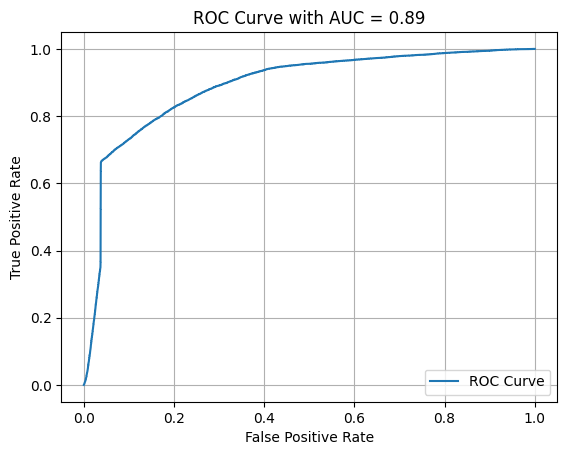

In [65]:
model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train1, y_train1)

ypred_train14 = model3.predict(x_train1)
y_pred_test14 = model3.predict(x_test1)

print("Training Results\n")
print(classification_report(y_train1, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test1, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model3.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()